In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#import country_converter as coco

#converter = coco.CountryConverter()

deterministic_df = pd.read_csv('../../data/tidy/deterministic_wdi_iso.csv', low_memory=False)
mobility_activity_df = pd.read_csv('../../data/tidy/cases_mobility_activity.csv', low_memory=False)
iso_df = pd.read_csv('../../data/raw/iso_3digit_alpha_country_codes.csv', low_memory=False)
measures_df = pd.read_csv('../../data/tidy/govt_measures.csv', low_memory=False)

#google_activity
google_activity_df = pd.read_csv('../../data/tidy/google_activity.csv', low_memory=False)

rename_dict = iso_df.set_index('Definition').to_dict()['Code_Value']
mobility_activity_df["iso"] = mobility_activity_df["region"].apply(lambda x: rename_dict.get(x))
deterministic_df["iso"] = deterministic_df["country"].apply(lambda x: rename_dict.get(x))

unique_region = set(mobility_activity_df.iso.unique().tolist())
deterministic_countries = set(deterministic_df['ifs'].values.tolist())


def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

mobility_deterministic = pd.merge(mobility_activity_df, deterministic_df, how='left', left_on='iso', right_on='ifs')
mobility_deterministic_measures = pd.merge(mobility_deterministic, measures_df, left_on='ifs', right_on='ISO')


In [78]:
df = pd.read_csv('../../data/tidy/google_activity.csv', low_memory=False)

df = df.rename(columns={"country_region": "country",
                        "country_region_code": "iso", #jbo: try to make all the multiindex labels consistent across the different sources (I changed this from "code" to "iso"
                        "retail_and_recreation_percent_change_from_baseline": "retail", 
                        "grocery_and_pharmacy_percent_change_from_baseline": "grocery",
                        "parks_percent_change_from_baseline": "parks",
                        "transit_stations_percent_change_from_baseline": "transit",
                        "workplaces_percent_change_from_baseline": "workplaces",
                        "residential_percent_change_from_baseline": "residential"})
df = df[['iso', 'date','retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential']]

#multicol1 = pd.MultiIndex.from_tuples([('category', 'date'),
#                                      ('category', 'retail'),
#                                      ('category', 'grocery'),
#                                      ('category', 'parks'),
#                                      ('category', 'transit'),
#                                      ('category', 'workplaces'),
#                                      ('category', 'residential')])
df1 = pd.melt(df, id_vars=['iso','date'], value_vars = ['retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential'], 
        var_name="activity", 
        value_name="percent_change")
df1 = df1.pivot_table(index=['iso','activity'],columns='date',values='percent_change') 
df1.head() #check

date             2020-02-15  2020-02-16  2020-02-17  2020-02-18  2020-02-19  \
iso activity                                                                  
AE  grocery             4.0         4.0         1.0         1.0         0.0   
    parks               5.0         4.0         5.0         5.0         4.0   
    residential         1.0         1.0         1.0         1.0         1.0   
    retail              0.0         1.0        -1.0        -2.0        -2.0   
    transit             0.0         1.0         1.0         0.0        -1.0   

date             2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  \
iso activity                                                                  
AE  grocery             1.0         2.0         2.0         3.0         0.0   
    parks               6.0         6.0         4.0         3.0         5.0   
    residential         1.0         1.0         1.0         1.0         1.0   
    retail             -2.0        -3.0        -2.0        -1.0        -3.0   
    transit             1.0         0.0        -2.0        -1.0        -1.0   

date             ...  2020-09-27  2020-09-28  2020-09-29  2020-09-30  \
iso activity     ...                                                   
AE  grocery      ...        -3.0        -7.0        -5.0        -2.0   
    parks        ...       -41.0       -44.0       -42.0       -41.0   
    residential  ...        10.0        11.0        10.0         9.0   
    retail       ...       -22.0       -25.0       -24.0       -23.0   
    transit      ...       -40.0       -41.0       -40.0       -38.0   

date             2020-10-01  2020-10-02  2020-10-03  2020-10-04  2020-10-05  \
iso activity                                                                  
AE  grocery             0.0        -5.0        -1.0         1.0        -3.0   
    parks             -38.0       -44.0       -40.0       -34.0       -38.0   
    residential         9.0         8.0         6.0         8.0         9.0   
    retail            -22.0       -26.0       -22.0       -20.0       -23.0   
    transit           -38.0       -40.0       -38.0       -35.0       -38.0   

date             2020-10-06  
iso activity                 
AE  grocery            -3.0  
    parks             -38.0  
    residential         8.0  
    retail            -23.0  
    transit           -38.0  

[5 rows x 235 columns]

In [21]:
#google_activity
df = pd.read_csv('../../data/tidy/google_activity.csv', low_memory=False)
df = df[['country_region_code', 'country_region', 'date', 'retail_and_recreation_percent_change_from_baseline']]
df.date = pd.to_datetime(df.date)
df.tail()

,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline
46638,ZW,Zimbabwe,2020-10-02,-5.0
46639,ZW,Zimbabwe,2020-10-03,-4.0
46640,ZW,Zimbabwe,2020-10-04,-3.0
46641,ZW,Zimbabwe,2020-10-05,-8.0
46642,ZW,Zimbabwe,2020-10-06,-7.0


In [22]:
start_date = dt.datetime(2020,2,1)
date_range = pd.date_range(start_date, periods=213, freq='D')
idf = pd.DataFrame(
    data=0,
    index=pd.MultiIndex.from_product([df.retail_and_recreation_percent_change_from_baseline.unique(), df.country_region_code.unique()]),
    columns=date_range
)
idf.head()

2020-02-01  2020-02-02  2020-02-03  2020-02-04  2020-02-05  \
0.0 AE           0           0           0           0           0   
    AF           0           0           0           0           0   
    AG           0           0           0           0           0   
    AO           0           0           0           0           0   
    AR           0           0           0           0           0   

        2020-02-06  2020-02-07  2020-02-08  2020-02-09  2020-02-10  ...  \
0.0 AE           0           0           0           0           0  ...   
    AF           0           0           0           0           0  ...   
    AG           0           0           0           0           0  ...   
    AO           0           0           0           0           0  ...   
    AR           0           0           0           0           0  ...   

        2020-08-22  2020-08-23  2020-08-24  2020-08-25  2020-08-26  \
0.0 AE           0           0           0           0           0   
    AF           0           0           0           0           0   
    AG           0           0           0           0           0   
    AO           0           0           0           0           0   
    AR           0           0           0           0           0   

        2020-08-27  2020-08-28  2020-08-29  2020-08-30  2020-08-31  
0.0 AE           0           0           0           0           0  
    AF           0           0           0           0           0  
    AG           0           0           0           0           0  
    AO           0           0           0           0           0  
    AR           0           0           0           0           0  

[5 rows x 213 columns]

In [103]:
google_activity_df.head()

#is_NaN = df.isnull()
#row_has_NaN = is_NaN.any(axis=1)
#rows_with_NaN = df[row_has_NaN]

#df['iso_3166_2_code'].isnull()

#df = df[df['sub_region_1'].isna()]
#df.to_excel("output.xlsx") 

#df = df[df.iso_3166_2_code.notnull()]
#df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [58]:
measures_df

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,12/2/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,12/2/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,12/2/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,12/2/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,12/3/2020,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,14/03/2020,NaN
5,6,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Movement restrictions,Border closure,No,Closure of borders with Iran,NaN,24/02/2020,Guardian,Media,https://www.theguardian.com/global-development...,14/03/2020,NaN
6,8,Afghanistan,AFG,Herat,NaN,Asia,Introduction / extension of measures,Social distancing,Schools closure,No,NaN,NaN,1/3/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN
7,10,Afghanistan,AFG,Herat,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,all public gatherings banned,NaN,1/3/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN
8,12,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Strengthening the public health system,No,NaN,NaN,1/3/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN
9,17,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Limit product imports/exports,No,Food imports from Iran and Afghanistan has bee...,NaN,1/3/2020,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,14/03/2020,NaN


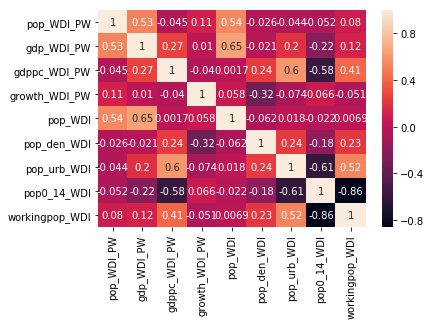

In [64]:
import seaborn as sn
import matplotlib.pyplot as plt

len(unique_region)
cor_matrix = deterministic_df.iloc[:,7:].corr()

sn.heatmap(cor_matrix, annot=True)
plt.show()